<a href="https://colab.research.google.com/github/ashraful009/Banglish-Abuse-Words-detection/blob/main/Final_Hate_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banglish Hate Speech Binary Classification (Hate vs Non-Hate)

# 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

In [ ]:
df = pd.read_csv('Banglish_Hate_Speech_Dataset.csv')
df['Hate'] = df['Hate'].map({'Yes': 1, 'No': 0})


In [ ]:
df

,SL.,Comment,Hate,Type
0,1,Kanki ki der Allah sob samoy valo rake,1,Others
1,2,khanki akta,1,Sexual
2,3,Ore saniliyon,1,Sexual
3,4,Bokachoda Shangbadik,1,Slang
4,5,Balda dekhaiche,1,Slang
...,...,...,...,...
4995,4996,erum chahara loya gf asha koros,1,Appearance
4996,4997,tor ma durga ar radha ke bol amake shukh dia jete,1,Religious
4997,4998,tora to nun puja korish,1,Religious
4998,4999,malaun er bachchader dekhle bojha jau malura k...,1,Religious


# 3. Drop unnecessary columns

In [ ]:
df = df.drop(columns=['SL. ', 'Type'])

In [ ]:
df

,Comment,Hate
0,Kanki ki der Allah sob samoy valo rake,1
1,khanki akta,1
2,Ore saniliyon,1
3,Bokachoda Shangbadik,1
4,Balda dekhaiche,1
...,...,...
4995,erum chahara loya gf asha koros,1
4996,tor ma durga ar radha ke bol amake shukh dia jete,1
4997,tora to nun puja korish,1
4998,malaun er bachchader dekhle bojha jau malura k...,1


Hate
1    2836
0    2836
Name: count, dtype: int64


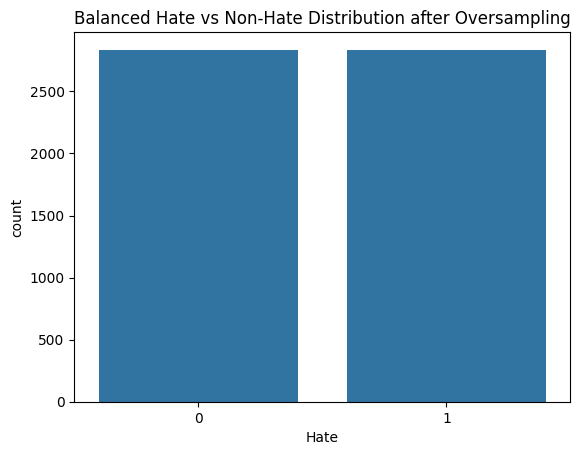

In [ ]:
# Apply Random Oversampling to Hate column
from imblearn.over_sampling import RandomOverSampler

X_oversample = df['Comment']
y_oversample = df['Hate']

# Convert to numpy for oversampling
X_np = X_oversample.values.reshape(-1, 1)
y_np = y_oversample.values

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_np, y_np)

# Convert back to DataFrame
df_balanced = pd.DataFrame({'Comment': X_resampled.flatten(), 'Hate': y_resampled})

# Use df_balanced in later steps
df = df_balanced

# Check distribution
print(df['Hate'].value_counts())
sns.countplot(data=df, x='Hate')
plt.title('Balanced Hate vs Non-Hate Distribution after Oversampling')
plt.show()


# 4. Data Visualization

Label Distribution:
Hate
1    2836
0    2836
Name: count, dtype: int64


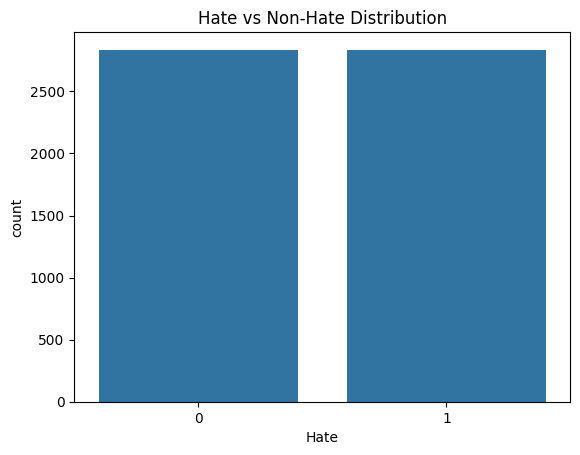

In [ ]:
print('Label Distribution:')
print(df['Hate'].value_counts())
sns.countplot(data=df, x='Hate')
plt.title('Hate vs Non-Hate Distribution')
plt.show()

# 5. Text Preprocessing

In [ ]:
import re
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", '', text)
    return text

df['Comment'] = df['Comment'].apply(preprocess_text)

In [ ]:
df

,Comment,Hate
0,kanki ki der allah sob samoy valo rake,1
1,khanki akta,1
2,ore saniliyon,1
3,bokachoda shangbadik,1
4,balda dekhaiche,1
...,...,...
5667,onek slim lagche apnake,0
5668,khela thik kor age cup jita chudai drkr nai,0
5669,thanks to jamal vai tar jonno apnake chinlam ajke,0
5670,amii ranna korta gia hata saka khaia falsii,0


# 6. TF-IDF Vectorization

In [ ]:
X = df['Comment']
y = df['Hate']
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X).toarray()

# 7. Train/Test split (Stratified)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

# 8. Metrics Function

In [ ]:
results_table = []
def record_metrics(name, y_true, y_pred, y_proba):
    results_table.append({
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_proba)
    })

# 9. Traditional ML Models

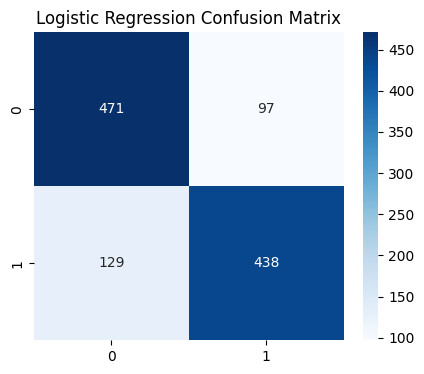

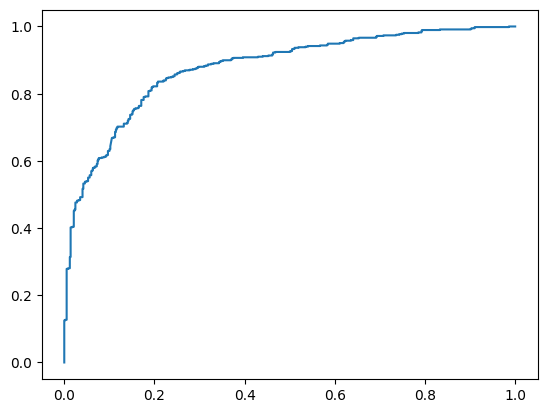

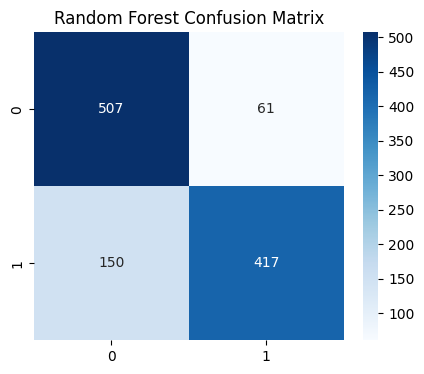

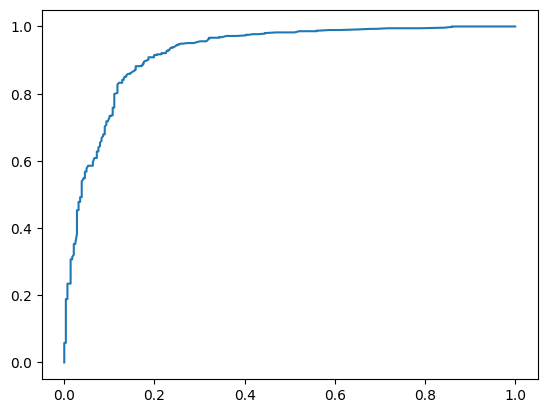

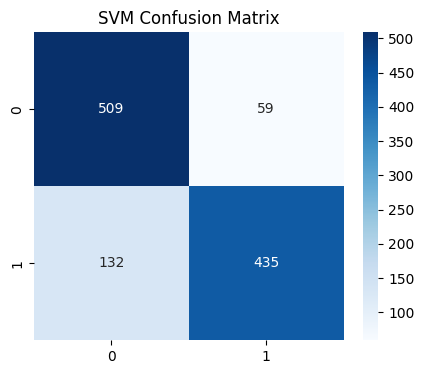

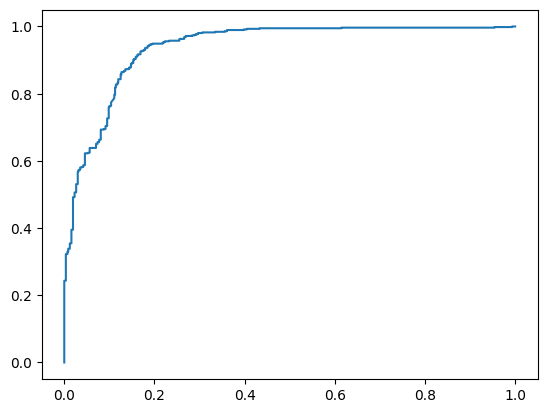

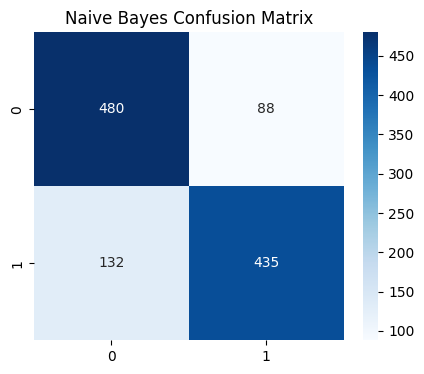

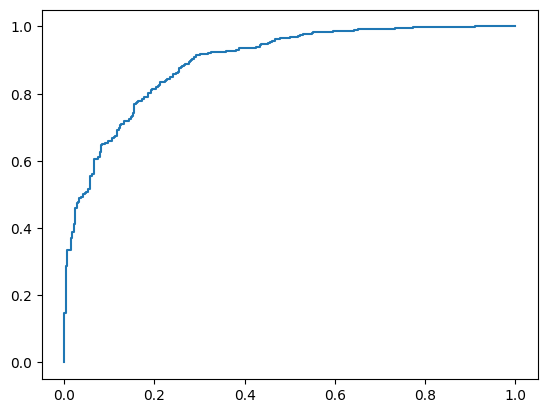

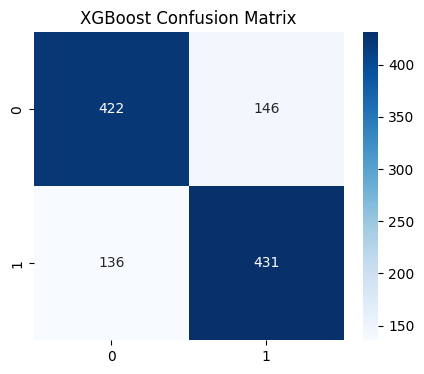

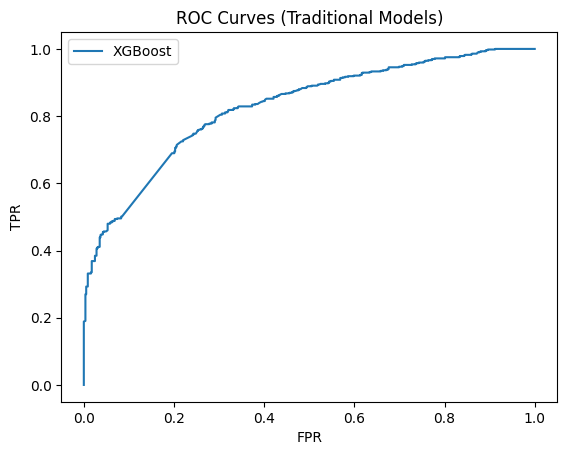

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'SVM': SVC(probability=True, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    record_metrics(name, y_test, y_pred, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.savefig(f'{name}_confusion_matrix.png') # Save confusion matrix plot
    plt.show()
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name}")
plt.title('ROC Curves (Traditional Models)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.savefig('traditional_models_roc_curves.png') # Save ROC curves plot
plt.show()

# 10. Hybrid Model (TF-IDF + XGBoost tuned)

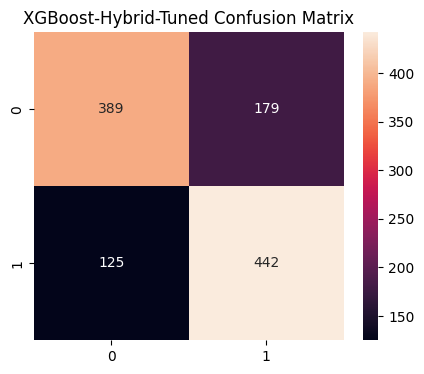

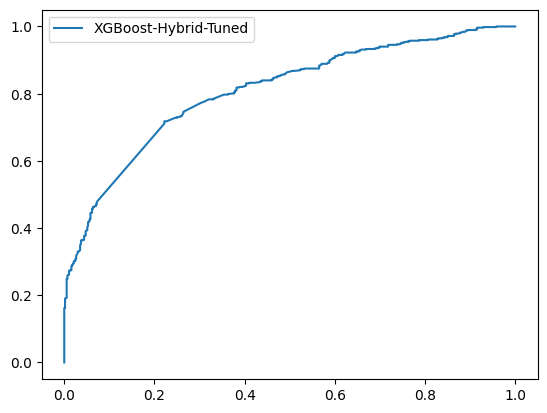

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)
grid = GridSearchCV(xgb, { 'max_depth': [3,5,7], 'n_estimators': [50,100,150], 'learning_rate': [0.01,0.1,0.2] }, scoring='f1', cv=3)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)
y_proba = grid.best_estimator_.predict_proba(X_test)[:,1]
record_metrics('XGBoost-Hybrid-Tuned', y_test, y_pred, y_proba)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4));
sns.heatmap(cm, annot=True, fmt='d')
plt.title('XGBoost-Hybrid-Tuned Confusion Matrix')
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='XGBoost-Hybrid-Tuned')
plt.legend()
plt.show()

# 11. Deep Learning Model (BiLSTM)

Epoch 1/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5273 - loss: 0.6902 - val_accuracy: 0.6035 - val_loss: 0.6731
Epoch 2/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6791 - loss: 0.6324 - val_accuracy: 0.6685 - val_loss: 0.5827
Epoch 3/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8170 - loss: 0.4175 - val_accuracy: 0.7258 - val_loss: 0.5922
Epoch 4/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9000 - loss: 0.2492 - val_accuracy: 0.7313 - val_loss: 0.6323
Epoch 5/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9361 - loss: 0.1780 - val_accuracy: 0.7159 - val_loss: 0.7041
Epoch 6/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9560 - loss: 0.1284 - val_accuracy: 0.7225 - val_loss: 0.8641
Epoch 7/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9672 - loss: 0.0916 - val_accuracy: 0.7225 - val_loss: 1.0403
Epoch 8/8
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9714 - loss: 0.0777 - val_accuracy: 0.7137 - val_loss: 1.121

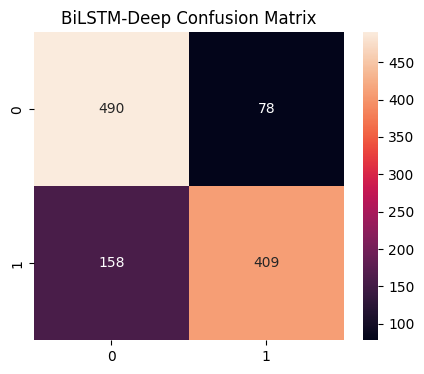

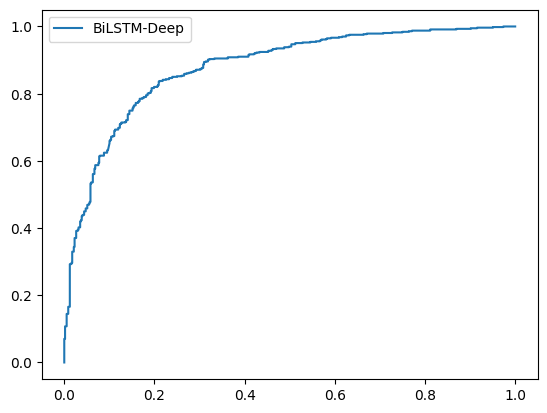

In [ ]:
tok = Tokenizer(num_words=4000)
tok.fit_on_texts(X)
X_seq = tok.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=40)
X_pad_train, X_pad_test, y_dl_train, y_dl_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)
dl_model = Sequential()
dl_model.add(Embedding(4000, 50, input_length=40))
dl_model.add(Bidirectional(LSTM(56, return_sequences=False)))
dl_model.add(Dropout(0.4))
dl_model.add(Dense(1, activation='sigmoid'))
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X_pad_train, y_dl_train, validation_split=0.2, epochs=8, batch_size=64)
y_dl_pred_prob = dl_model.predict(X_pad_test)
y_dl_pred = (y_dl_pred_prob > 0.5).astype('int')
record_metrics('BiLSTM-Deep', y_dl_test, y_dl_pred, y_dl_pred_prob)
cm = confusion_matrix(y_dl_test, y_dl_pred)
plt.figure(figsize=(5,4));
sns.heatmap(cm, annot=True, fmt='d')
plt.title('BiLSTM-Deep Confusion Matrix')
plt.show()
fpr, tpr, _ = roc_curve(y_dl_test, y_dl_pred_prob)
plt.plot(fpr, tpr, label='BiLSTM-Deep')
plt.legend()
plt.show()

# 12. Transformer Model (General BERT)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglishbert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4537 [00:00<?, ? examples/s]

Map:   0%|          | 0/1135 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Roc Auc
1,0.624400,0.523801,0.742731,0.704453,0.826603,0.613757,0.842558
2,0.437800,0.413457,0.812335,0.793003,0.883117,0.719577,0.903495
3,0.277800,0.528448,0.804405,0.769710,0.934509,0.654321,0.923572
4,0.170000,0.486479,0.844934,0.830116,0.916844,0.758377,0.934775
5,0.088300,0.578736,0.849339,0.833496,0.930435,0.754850,0.939737
6,0.057300,0.531715,0.859912,0.849289,0.918033,0.790123,0.942125


{'eval_loss': 0.5317152142524719, 'eval_accuracy': 0.8599118942731278, 'eval_f1': 0.8492890995260663, 'eval_precision': 0.9180327868852459, 'eval_recall': 0.7901234567901234, 'eval_roc_auc': 0.9421249720545494, 'eval_runtime': 2.5733, 'eval_samples_per_second': 441.067, 'eval_steps_per_second': 13.99, 'epoch': 6.0}


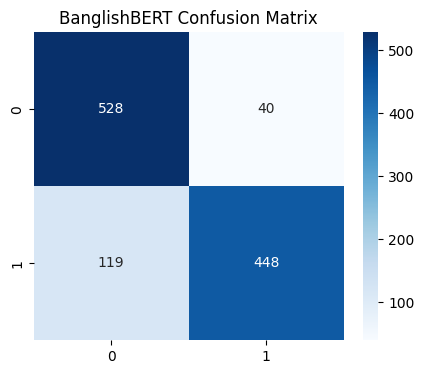

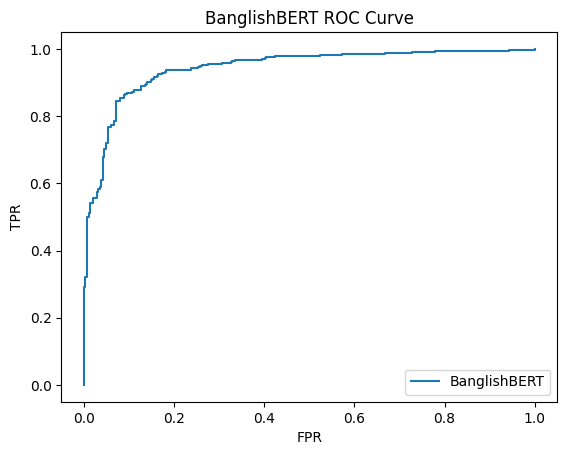

In [ ]:
# 12. Transformer Model (BanglishBERT - csebuetnlp/banglishbert)

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve


# Prepare data for HuggingFace datasets
df_tmp = df[['Comment', 'Hate']].copy()
train_df, test_df = train_test_split(df_tmp, test_size=0.2, stratify=df_tmp['Hate'], random_state=42)

# Rename 'Hate' column to 'labels' for Trainer
train_df = train_df.rename(columns={'Hate': 'labels'})
test_df = test_df.rename(columns={'Hate': 'labels'})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load BanglishBERT
model_name = "csebuetnlp/banglishbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

def tokenize(batch):
    return tokenizer(batch['Comment'], padding="max_length", truncation=True, max_length=40)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Set format to include 'labels'
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Training Arguments
training_args = TrainingArguments(
    output_dir='./banglishbert_results',
    num_train_epochs=6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    eval_strategy="epoch", # Evaluate and log metrics at the end of each epoch
    save_strategy="epoch", # Save checkpoint at the end of each epoch
    logging_strategy="epoch", # Log training metrics at the end of each epoch
    logging_dir='./logs',
    logging_steps=10, # Log training loss every 10 steps
    load_best_model_at_end=True, # Load the best model based on the evaluation metric
    metric_for_best_model='eval_f1', # Metric to track for the best model
    lr_scheduler_type='cosine',
    learning_rate=3e-5,
    weight_decay=0.01,
    save_total_limit=1,
)


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    probs = torch.nn.functional.softmax(torch.tensor(logits),dim=-1)[:,1].numpy()
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "precision": precision_score(labels, preds),
        "recall": recall_score(labels, preds),
        "roc_auc": roc_auc_score(labels, probs)
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
results = trainer.evaluate()
print(results)

# Confusion matrix and ROC curve
raw_pred = trainer.predict(test_dataset)
y_true = raw_pred.label_ids
y_pred = np.argmax(raw_pred.predictions, axis=1)
y_probs = torch.nn.functional.softmax(torch.tensor(raw_pred.predictions),dim=-1)[:,1].numpy()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('BanglishBERT Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label='BanglishBERT')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('BanglishBERT ROC Curve')
plt.legend()
plt.show()

# Add results to comparison table
record_metrics('BanglishBERT-Transformer', y_true, y_pred, y_probs)

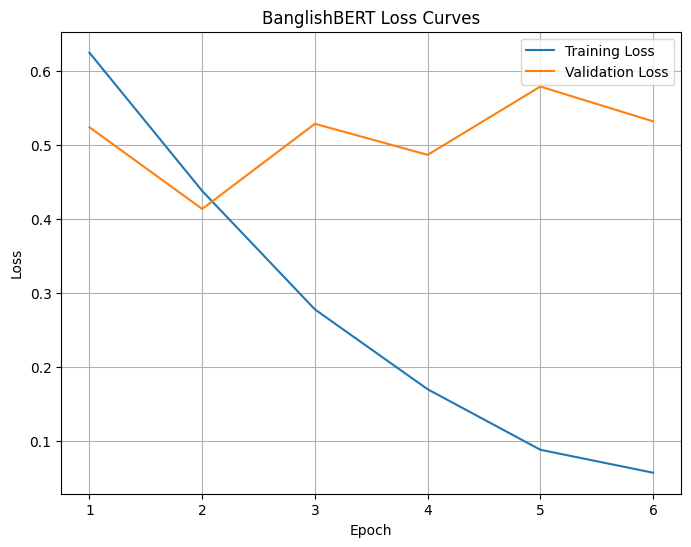

In [ ]:
# Extract training and validation loss from log history
train_loss = []
train_epochs = []
eval_loss = []
eval_epochs = []

for log_entry in trainer.state.log_history:
    if 'loss' in log_entry:
        train_loss.append(log_entry['loss'])
        train_epochs.append(log_entry['epoch'])
    if 'eval_loss' in log_entry:
        eval_loss.append(log_entry['eval_loss'])
        eval_epochs.append(log_entry['epoch'])


# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_epochs, train_loss, label='Training Loss')
plt.plot(eval_epochs, eval_loss, label='Validation Loss')
plt.title('BanglishBERT Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Find and print final training and validation accuracy

# Get the last logged training accuracy
final_train_accuracy = None
for log_entry in reversed(trainer.state.log_history):
    if 'accuracy' in log_entry:
        final_train_accuracy = log_entry['accuracy']
        break

# Get the final evaluation accuracy
final_eval_accuracy = None
for log_entry in reversed(trainer.state.log_history):
    if 'eval_accuracy' in log_entry:
        final_eval_accuracy = log_entry['eval_accuracy']
        break

if final_train_accuracy is not None:
    print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
else:
    print("Training accuracy not found in logs.")

if final_eval_accuracy is not None:
    print(f"Final Validation Accuracy: {final_eval_accuracy:.4f}")
else:
    print("Validation accuracy not found in logs.")

# Alternatively, the final evaluation accuracy is also available in the results dictionary
if 'eval_accuracy' in results:
    print(f"Final Validation Accuracy from results: {results['eval_accuracy']:.4f}")

Training accuracy not found in logs.
Final Validation Accuracy: 0.8599
Final Validation Accuracy from results: 0.8599


# 13. Summary Table of Model Results

In [ ]:

results_df = pd.DataFrame(results_table)
print(results_df)

                      Model  Accuracy        F1  Precision   ROC_AUC
0       Logistic Regression  0.800881  0.794918   0.818692  0.877378
1             Random Forest  0.814097  0.798086   0.872385  0.921439
2                       SVM  0.831718  0.819981   0.880567  0.937412
3               Naive Bayes  0.806167  0.798165   0.831740  0.895087
4                   XGBoost  0.751542  0.753497   0.746967  0.827345
5      XGBoost-Hybrid-Tuned  0.732159  0.744108   0.711755  0.808217
6               BiLSTM-Deep  0.792070  0.776091   0.839836  0.877866
7  BanglishBERT-Transformer  0.849339  0.841226   0.888235  0.926066
8  BanglishBERT-Transformer  0.859912  0.849289   0.918033  0.942125


# 14. Heatmap of Metrics Comparison

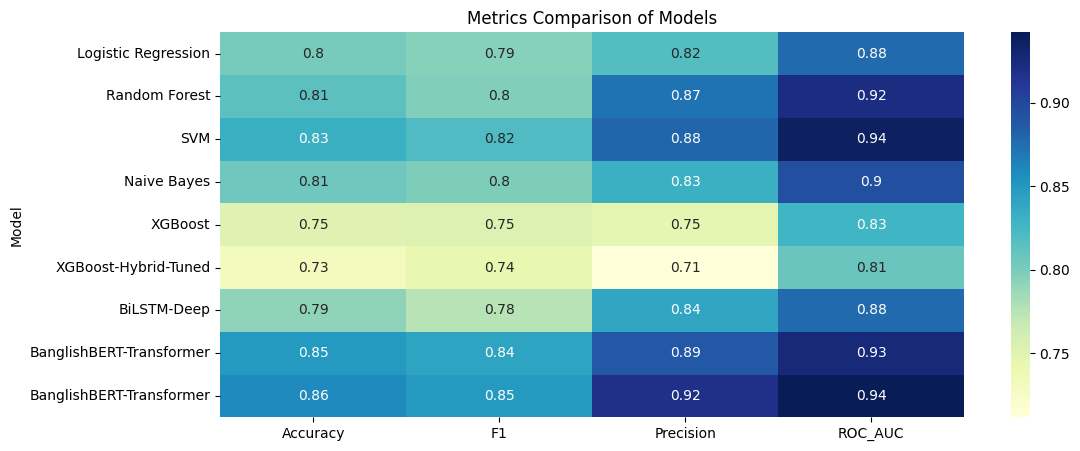

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap='YlGnBu')
plt.title('Metrics Comparison of Models')
plt.savefig('metrics_comparison.png')
plt.show()
